## Skin Cancer Image Classification

Given *image data about various skin lesions*, let's try to predict the **type** of a given lesion.

We will use TensorFlow CNN to make our predictions.

Data source: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000?select=hmnist_28_28_L.csv

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

2025-06-09 22:43:23.765775: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('hmnist_28_28_L.csv')
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,172,171,173,175,164,187,207,210,208,206,...,210,217,221,209,185,187,192,192,192,0
10011,2,34,108,116,114,119,131,139,139,145,...,173,169,168,168,143,138,83,23,3,0
10012,122,154,162,170,179,197,200,195,202,199,...,221,215,205,187,209,198,187,164,156,0
10013,137,143,141,139,147,152,155,152,155,159,...,172,171,175,183,177,170,169,166,170,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 785 entries, pixel0000 to label
dtypes: int64(785)
memory usage: 60.0 MB


### Preprocessing

In [4]:
data.isna().sum().sum()

0

In [5]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

There are 7 possible labels.

From the dataset provider:

* 0: nv - Melanocytic nevi
* 1: mel - Melanoma
* 2: bkl - Benign Keratosis-like lesions
* 3: bcc - Basal cell carcinoma
* 4: akiec - Actinic keratoses and intraepithelial carcinoma / Bowen's diseases
* 5: vasc - Vascular lesions
* 6: df - Dermatofibroma

In [6]:
y.value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [7]:
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

#### Rescaling

Let's rescale the pixel values to be between 0 and 1.

We want images of size 28x28 so let's reshape each vector into a 2-D array of the proper size.\
(We will actually make the images into 3-D arrays with a dummy dimension for the single color channel)

In [10]:
X = X / 255

X

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,0.662745,0.670588,0.666667,0.694118,0.709804,0.713725,0.709804,0.725490,0.760784,0.752941,...,0.690196,0.721569,0.729412,0.725490,0.705882,0.615686,0.549020,0.549020,0.623529,0.647059
1,0.074510,0.223529,0.411765,0.549020,0.584314,0.580392,0.564706,0.607843,0.666667,0.666667,...,0.709804,0.674510,0.686275,0.627451,0.564706,0.447059,0.349020,0.184314,0.070588,0.070588
2,0.607843,0.639216,0.631373,0.654902,0.654902,0.674510,0.607843,0.596078,0.647059,0.686275,...,0.635294,0.639216,0.698039,0.615686,0.650980,0.654902,0.580392,0.552941,0.533333,0.450980
3,0.098039,0.278431,0.454902,0.545098,0.533333,0.600000,0.580392,0.631373,0.674510,0.635294,...,0.556863,0.490196,0.529412,0.541176,0.537255,0.435294,0.278431,0.125490,0.062745,0.062745
4,0.505882,0.635294,0.709804,0.768627,0.803922,0.815686,0.803922,0.835294,0.882353,0.878431,...,0.827451,0.823529,0.772549,0.674510,0.745098,0.764706,0.756863,0.709804,0.576471,0.345098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.674510,0.670588,0.678431,0.686275,0.643137,0.733333,0.811765,0.823529,0.815686,0.807843,...,0.823529,0.823529,0.850980,0.866667,0.819608,0.725490,0.733333,0.752941,0.752941,0.752941
10011,0.007843,0.133333,0.423529,0.454902,0.447059,0.466667,0.513725,0.545098,0.545098,0.568627,...,0.721569,0.678431,0.662745,0.658824,0.658824,0.560784,0.541176,0.325490,0.090196,0.011765
10012,0.478431,0.603922,0.635294,0.666667,0.701961,0.772549,0.784314,0.764706,0.792157,0.780392,...,0.874510,0.866667,0.843137,0.803922,0.733333,0.819608,0.776471,0.733333,0.643137,0.611765
10013,0.537255,0.560784,0.552941,0.545098,0.576471,0.596078,0.607843,0.596078,0.607843,0.623529,...,0.698039,0.674510,0.670588,0.686275,0.717647,0.694118,0.666667,0.662745,0.650980,0.666667


In [11]:
X = np.array(X)
print(X.shape)

(10015, 784)


In [14]:
X = X.reshape(-1, 28, 28, 1)
X.shape

(10015, 28, 28, 1)

### Visualization

Let's take a look at few of the images.

In [29]:
sample_data = pd.Series(list(zip(X, y))).sample(9)

sample_data

1222    ([[[0.6627451], [0.78431373], [0.79215686], [0...
4950    ([[[0.55686275], [0.63529412], [0.61568627], [...
8296    ([[[0.69019608], [0.69411765], [0.69019608], [...
283     ([[[0.71764706], [0.74117647], [0.75294118], [...
6518    ([[[0.47843137], [0.48235294], [0.4745098], [0...
1758    ([[[0.47058824], [0.45490196], [0.40392157], [...
2603    ([[[0.04313725], [0.12941176], [0.36470588], [...
8575    ([[[0.26666667], [0.43137255], [0.55686275], [...
2182    ([[[0.34901961], [0.36862745], [0.41568627], [...
dtype: object

In [30]:
sample_X = np.stack(np.array(sample_data.apply(lambda x: x[0])))
sample_y = np.array(sample_data.apply(lambda x: x[1]))

In [31]:
sample_X

array([[[[0.6627451 ],
         [0.78431373],
         [0.79215686],
         ...,
         [0.89019608],
         [0.83137255],
         [0.73333333]],

        [[0.74117647],
         [0.83529412],
         [0.83921569],
         ...,
         [0.90588235],
         [0.8627451 ],
         [0.79215686]],

        [[0.81176471],
         [0.87843137],
         [0.84705882],
         ...,
         [0.90196078],
         [0.88627451],
         [0.82745098]],

        ...,

        [[0.68627451],
         [0.80392157],
         [0.8745098 ],
         ...,
         [0.81960784],
         [0.75686275],
         [0.6745098 ]],

        [[0.6       ],
         [0.76470588],
         [0.83137255],
         ...,
         [0.80784314],
         [0.70588235],
         [0.6       ]],

        [[0.50588235],
         [0.69019608],
         [0.77254902],
         ...,
         [0.76862745],
         [0.61960784],
         [0.48235294]]],


       [[[0.55686275],
         [0.63529412],
         [0.61

In [32]:
sample_X.shape

(9, 28, 28, 1)

In [33]:
sample_y.shape

(9,)

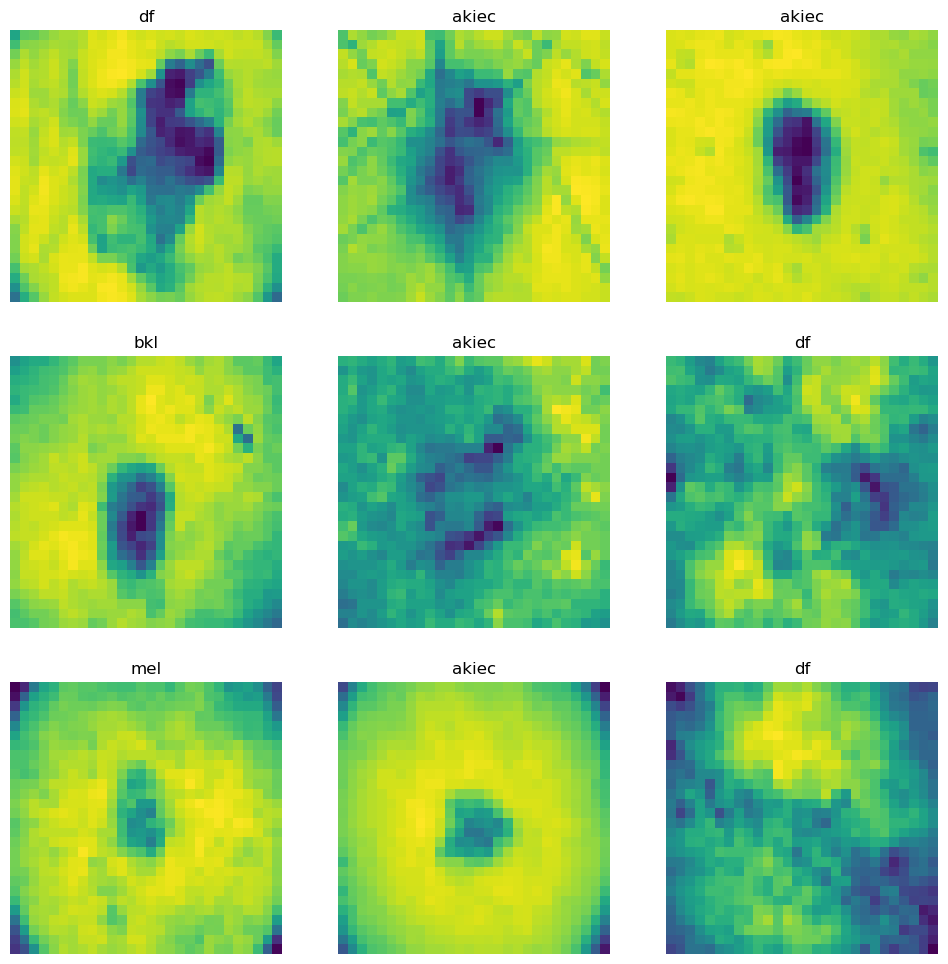

In [34]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(sample_X[i]))
    img_label = label_mapping[sample_y[i]]
    plt.title(img_label)
    plt.axis('off')

plt.show()

#### Train-test split

Let's split the data into train and test sets.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [36]:
X_train

array([[[[0.61176471],
         [0.62745098],
         [0.63137255],
         ...,
         [0.61960784],
         [0.6       ],
         [0.57254902]],

        [[0.59607843],
         [0.60784314],
         [0.60784314],
         ...,
         [0.61960784],
         [0.58823529],
         [0.56862745]],

        [[0.58431373],
         [0.59215686],
         [0.60392157],
         ...,
         [0.61176471],
         [0.58431373],
         [0.59215686]],

        ...,

        [[0.57647059],
         [0.58431373],
         [0.58039216],
         ...,
         [0.58039216],
         [0.58431373],
         [0.57254902]],

        [[0.58039216],
         [0.57254902],
         [0.57254902],
         ...,
         [0.58431373],
         [0.58039216],
         [0.57254902]],

        [[0.56470588],
         [0.56470588],
         [0.56078431],
         ...,
         [0.58431373],
         [0.57254902],
         [0.57647059]]],


       [[[0.01176471],
         [0.07058824],
         [0.30

### Modeling

We will use a 2-D convolutional neural network to extract features from the images while we train.

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 26, 26, 16)        160       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 13, 13, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 11, 11, 32)        4640      
                                                                 
 maxpool2 (MaxPooling2D)     (None, 5, 5, 32)          0         
                                                                 
 avgpool (GlobalAveragePooli  (None, 32)               0         
 ng2D)                                                           
                                                           

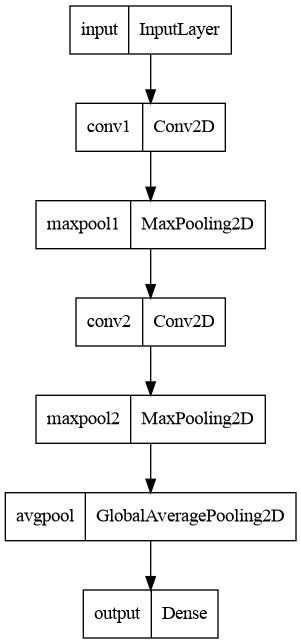

In [44]:
inputs = tf.keras.Input(shape=(28, 28, 1), name='input')

conv1 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, name='conv1')(inputs)
maxpool1 = tf.keras.layers.MaxPooling2D(name='maxpool1')(conv1)

conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, name='conv2')(maxpool1)
maxpool2 = tf.keras.layers.MaxPooling2D(name='maxpool2')(conv2)

avgpool = tf.keras.layers.GlobalAveragePooling2D(name='avgpool')(maxpool2)

outputs = tf.keras.layers.Dense(7, activation='softmax', name='output')(avgpool)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

tf.keras.utils.plot_model(model)

### Training

We will train using an Adam optimizer and a sparse categorical crossentropy loss function.

In [45]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
176/176 [==============================] - 3s 11ms/step - loss: 1.1825 - accuracy: 0.6630 - val_loss: 1.1901 - val_accuracy: 0.6583
Epoch 2/50
176/176 [==============================] - 2s 12ms/step - loss: 1.1433 - accuracy: 0.6762 - val_loss: 1.1743 - val_accuracy: 0.6583
Epoch 3/50
176/176 [==============================] - 2s 14ms/step - loss: 1.1352 - accuracy: 0.6762 - val_loss: 1.1639 - val_accuracy: 0.6583
Epoch 4/50
176/176 [==============================] - 2s 12ms/step - loss: 1.1267 - accuracy: 0.6762 - val_loss: 1.1530 - val_accuracy: 0.6583
Epoch 5/50
176/176 [==============================] - 2s 12ms/step - loss: 1.1103 - accuracy: 0.6762 - val_loss: 1.1295 - val_accuracy: 0.6583
Epoch 6/50
176/176 [==============================] - 2s 10ms/step - loss: 1.0887 - accuracy: 0.6762 - val_loss: 1.1083 - val_accuracy: 0.6583
Epoch 7/50
176/176 [==============================] - 2s 10ms/step - loss: 1.0760 - accuracy: 0.6760 - val_loss: 1.1261 - val_accuracy: 0.6583

### Results

In [46]:
model_acc = model.evaluate(X_test, y_test)[1]

print("Test Accuracy : {:.3f}%".format(model_acc*100))

94/94 [==============================] - 1s 6ms/step - loss: 0.9921 - accuracy: 0.6692
Test Accuracy : 66.922%


In [53]:
y_true = np.array(y_test)

y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

94/94 [==============================] - 1s 6ms/step


In [54]:
y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [55]:
y_true

array([0, 4, 4, ..., 4, 4, 4])

In [56]:
cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

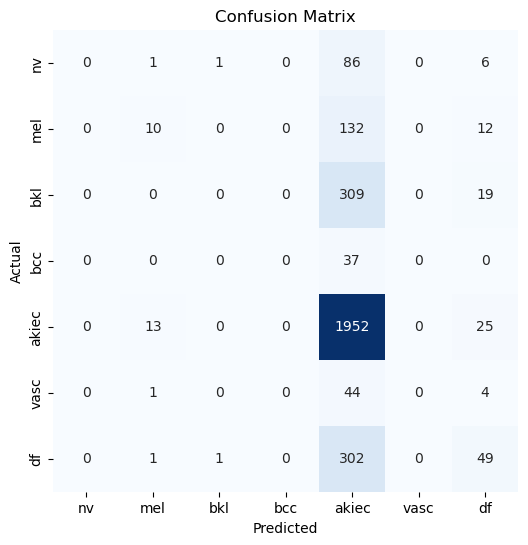

In [59]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
plt.xticks(np.arange(7)+0.5, label_mapping.values())
plt.xlabel('Predicted')
plt.yticks(np.arange(7)+0.5, label_mapping.values())
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
print("Classification Report: ----------------------------\n", clr)

Classification Report: ----------------------------
               precision    recall  f1-score   support

          nv       0.00      0.00      0.00        94
         mel       0.38      0.06      0.11       154
         bkl       0.00      0.00      0.00       328
         bcc       0.00      0.00      0.00        37
       akiec       0.68      0.98      0.80      1990
        vasc       0.00      0.00      0.00        49
          df       0.43      0.14      0.21       353

    accuracy                           0.67      3005
   macro avg       0.21      0.17      0.16      3005
weighted avg       0.52      0.67      0.56      3005

